# High Irradiance Response (HIRES)

The HIRES problem is a common stiff differential equation.

In [1]:
import os

import jax.numpy as jnp
import matplotlib.pyplot as plt

from probdiffeq.util.doc_util import notebook

In [2]:
def load_results():
    """Load the results from a file."""
    return jnp.load("./results.npy", allow_pickle=True)[()]


def choose_style(label):
    """Choose a plotting style for a given algorithm."""
    if "SciPy" in label:
        return {"color": "C0"}
    if "TS" in label:
        return {"color": "C1"}
    return None


def plot_results(axis, results):
    """Plot the results."""
    for label, wp in results.items():
        style = choose_style(label)

        precision = wp["precision"]
        work_mean, work_std = (wp["work_mean"], wp["work_std"])
        axis.loglog(precision, work_mean, label=label, **style)

        range_lower, range_upper = work_mean - work_std, work_mean + work_std
        axis.fill_between(precision, range_lower, range_upper, alpha=0.3, **style)

    axis.set_xlabel("Precision")
    axis.set_ylabel("Work")
    axis.legend()
    axis.grid()
    return axis

I0000 00:00:1696060305.266226  281654 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


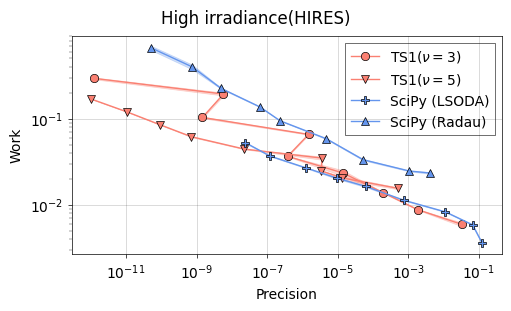

In [3]:
plt.rcParams.update(notebook.plot_config())

fig, axis = plt.subplots(figsize=(5, 3), dpi=100, constrained_layout=True)
fig.suptitle("High irradiance(HIRES)")

results = load_results()
axis = plot_results(axis, results)

plt.show()